# data

In [248]:
import numpy as np
import pickle
with open('/home/ubuntu/gangmin/tsvt/multimodal/data/audio_energy_1_normaized.pickle',"rb") as f:
    energy1 = pickle.load(f)

In [249]:

import json
with open('/home/ubuntu/2020_1/cap/tsvt/multimodal/data/chat_feature_pred_128_test.json',"rb") as f:
    chat_test = json.load(f)
with open('/home/ubuntu/2020_1/cap/tsvt/multimodal/data/chat_feature_pred_128_train.json',"rb") as f:
    chat_train = json.load(f)
with open('/home/ubuntu/2020_1/cap/tsvt/multimodal/data/chat_feature_pred_128_val.json',"rb") as f:
    chat_val = json.load(f)

In [250]:
for key in chat_train.keys():
    print(len(chat_train[key][0]))
    break

128


In [251]:
len(energy1[key])

16540

# label

In [252]:
import numpy as np
import pickle
import copy
with open('/home/ubuntu/gangmin/tsvt/multimodal/label/label.pickle',"rb") as f:
    label = pickle.load(f)

In [253]:
a=[1,2]
b=[3,4]
a = a+b
print(a)

[1, 2, 3, 4]


# data fusion

In [254]:
for key in chat_train.keys():
    for ii,raw in enumerate(chat_train[key]):
        i = ii*10
        j = i+10
        chat_train[key][ii] = raw + energy1[key][i:j]
        
for key in chat_test.keys():
    for ii,raw in enumerate(chat_test[key]):
        i = ii*10
        j = i+10
        chat_test[key][ii] = raw + energy1[key][i:j]
        
for key in chat_val.keys():
    for ii,raw in enumerate(chat_val[key]):
        i = ii*10
        j = i+10
        chat_val[key][ii] = raw + energy1[key][i:j]

In [255]:
for key in test:
    print(len(chat_test[str(key)][1]))
    break

138


In [256]:
for key in train:
    print(len(chat_train[str(key)][-1]))
    break

138


# index

In [257]:

train =[102844235753356742, 102844294666422466, 102844341906256529, 102979081290790284, 102844212430271695, 102844401155937960, 102844412704496937, 102844412722519367, 102844235749031358, 102844412709674293, 102844341902586509, 102844235750997440, 102844212431975640, 102844294667995333, 102844341912220311, 102844235747261881, 102844294670551241, 102844412707708209, 102844212430599377, 102844224145685626, 102844401152857762, 102844341908026005, 102844341909598870, 102844283023599703, 102844235753749959, 102844294670026952, 102844212430075086, 102844283027531868, 102844212430927059, 102844212429419722, 102844283025696858, 102844224146472059, 102844412712164667, 102844401153971877, 102844235748310460, 102844412711116088, 102844235752111555, 102844283020453971, 102844294666881219, 102844401152267937, 102844212429944013, 102844294671796427, 102844401151874719, 102844412723567946, 102844294669568199, 102844412709346612, 102844212431779031, 102844212430402768, 102844412711443769, 102844283027925085, 102844235746868664, 102844283023206486, 102844401154168486, 102844212429550795, 102844341907370644, 102844412721339716, 102844294667405508, 102844294674876621, 102844212429288649, 102844401154430631]

val = [102844412705545516, 102844401153447587, 102844341912679064, 102844212431320277, 102844212431516886, 102844401152071328, 102844341906977427, 102844212429747404, 102844235747982779, 102844412716686654, 102844294669109446, 102844412722847048, 102844412721012035, 102844401151219358, 102844235746475447, 102844412720618818, 102904869420860038, 102910307641576395, 102844235751783874, 102844224146930812, 102844341905011343, 102844235752963525, 102844235748703677, 102844235749424575, 102844412705217835, 102844412723174729, 102844401153578660, 102844341905404560, 102844412706987311, 102844341906649746]

test = [102844412717014335, 102844224148503678, 102844412711836986, 102844401156069033, 102844294670878922, 102844341904683662, 102844412704890154, 102844235746082230, 102844224148896895, 102844294674286796, 102844412708953395, 102844235751390657, 102844212428895431, 102844412717407552, 102844212429092040, 102844412707380528, 102844212430730450, 102844224147717245, 102844412716227901, 102844212431058132, 102844412710001974, 102844412706659630]
            

# MLP

In [258]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import adam
import pandas as pd
import numpy as np

In [259]:
'''
train_X = pd.DataFrame(columns=['audio'])
for key in train:
    train_X = pd.concat([train_X,pd.DataFrame(chat_train[str(key)])],axis=0)

train_X = train_X.reset_index()
train_X = train_X.drop('index',axis=1)
train_X = train_X.drop('audio',axis=1)
train_X.columns = ['audio']

test_X = pd.DataFrame(columns=['audio'])
for key in test:
    test_X = pd.concat([test_X,pd.DataFrame(chat_test[str(key)])],axis=0)

test_X = test_X.reset_index()
test_X = test_X.drop('index',axis=1)
test_X = test_X.drop('audio',axis=1)
test_X.columns = ['audio']

val_X = pd.DataFrame(columns=['audio'])
for key in val:
    val_X = pd.concat([val_X,pd.DataFrame(chat_val[str(key)])],axis=0)

val_X = val_X.reset_index()
val_X = val_X.drop('index',axis=1)
val_X = val_X.drop('audio',axis=1)
val_X.columns = ['audio']
'''


"\ntrain_X = pd.DataFrame(columns=['audio'])\nfor key in train:\n    train_X = pd.concat([train_X,pd.DataFrame(chat_train[str(key)])],axis=0)\n\ntrain_X = train_X.reset_index()\ntrain_X = train_X.drop('index',axis=1)\ntrain_X = train_X.drop('audio',axis=1)\ntrain_X.columns = ['audio']\n\ntest_X = pd.DataFrame(columns=['audio'])\nfor key in test:\n    test_X = pd.concat([test_X,pd.DataFrame(chat_test[str(key)])],axis=0)\n\ntest_X = test_X.reset_index()\ntest_X = test_X.drop('index',axis=1)\ntest_X = test_X.drop('audio',axis=1)\ntest_X.columns = ['audio']\n\nval_X = pd.DataFrame(columns=['audio'])\nfor key in val:\n    val_X = pd.concat([val_X,pd.DataFrame(chat_val[str(key)])],axis=0)\n\nval_X = val_X.reset_index()\nval_X = val_X.drop('index',axis=1)\nval_X = val_X.drop('audio',axis=1)\nval_X.columns = ['audio']\n"

In [260]:
train_y = pd.DataFrame(columns=['highlight'])
for key in train:
    temp = pd.DataFrame()
    temp['highlight'] = label[str(key)]
    
    train_y = pd.concat([train_y,temp],axis=0)
    
train_y = train_y.reset_index()
train_y = train_y.drop('index',axis=1)

test_y = pd.DataFrame(columns=['highlight'])
for key in test:
    temp = pd.DataFrame()
    temp['highlight'] = label[str(key)]
    
    test_y = pd.concat([test_y,temp],axis=0)
    
test_y = test_y.reset_index()
test_y = test_y.drop('index',axis=1)

val_y = pd.DataFrame(columns=['highlight'])
for key in val:
    temp = pd.DataFrame()
    temp['highlight'] = label[str(key)]
    
    val_y = pd.concat([val_y,temp],axis=0)
    
val_y = val_y.reset_index()
val_y = val_y.drop('index',axis=1)


# reshape

In [261]:
train_X = []
for key in train:
    train_X = train_X+chat_train[str(key)]
    
test_X = []
for key in test:
    test_X = test_X+chat_test[str(key)]
    
val_X = []
for key in val:
    val_X = val_X+chat_val[str(key)]

# build model

In [262]:
len(train_X)

123085

In [263]:
len(train_y)

123085

In [264]:
for i in val_X:
    if len(i) is not 138:
        print('ok')
        print(len(i))
        break

In [265]:
#build model
model = Sequential()
model.add(Dense(128, input_shape=(138,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [266]:
train_X = np.asarray(train_X)
test_X = np.asarray(test_X)
val_X = np.asarray(val_X)

In [267]:
from keras.callbacks import ModelCheckpoint
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='/home/ubuntu/gangmin/tsvt/multimodal/MLP_audio_chat_models/'+'{epoch:02d}-{val_loss:.4f}.hdf5',monitor = 'val_loss',verbose=1,save_best_only=True)


In [268]:
history = model.fit(train_X,train_y,epochs=200,batch_size=128,verbose=1,validation_data=[val_X,val_y],callbacks=[checkpoint])

Train on 123085 samples, validate on 58245 samples
Epoch 1/200
123085/123085 [==============================] - 3s 27us/step - loss: 0.4588 - accuracy: 0.8174 - val_loss: 0.4490 - val_accuracy: 0.8220

Epoch 00001: val_loss improved from inf to 0.44901, saving model to /home/ubuntu/gangmin/tsvt/multimodal/MLP_audio_chat_models/01-0.4490.hdf5
Epoch 2/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4535 - accuracy: 0.8177 - val_loss: 0.4483 - val_accuracy: 0.8214

Epoch 00002: val_loss improved from 0.44901 to 0.44834, saving model to /home/ubuntu/gangmin/tsvt/multimodal/MLP_audio_chat_models/02-0.4483.hdf5
Epoch 3/200
123085/123085 [==============================] - 3s 25us/step - loss: 0.4529 - accuracy: 0.8188 - val_loss: 0.4491 - val_accuracy: 0.8200

Epoch 00003: val_loss did not improve from 0.44834
Epoch 4/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4520 - accuracy: 0.8189 - val_loss: 0.4493 - val_accuracy: 0.8180

Epoch 

123085/123085 [==============================] - 3s 25us/step - loss: 0.4497 - accuracy: 0.8193 - val_loss: 0.4472 - val_accuracy: 0.8217

Epoch 00038: val_loss did not improve from 0.44683
Epoch 39/200
123085/123085 [==============================] - 3s 25us/step - loss: 0.4494 - accuracy: 0.8197 - val_loss: 0.4477 - val_accuracy: 0.8226

Epoch 00039: val_loss did not improve from 0.44683
Epoch 40/200
123085/123085 [==============================] - 3s 25us/step - loss: 0.4497 - accuracy: 0.8190 - val_loss: 0.4472 - val_accuracy: 0.8226

Epoch 00040: val_loss did not improve from 0.44683
Epoch 41/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4495 - accuracy: 0.8193 - val_loss: 0.4469 - val_accuracy: 0.8225

Epoch 00041: val_loss did not improve from 0.44683
Epoch 42/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4496 - accuracy: 0.8195 - val_loss: 0.4468 - val_accuracy: 0.8225

Epoch 00042: val_loss improved from 0.44683 to 0.


Epoch 00075: val_loss did not improve from 0.44627
Epoch 76/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4489 - accuracy: 0.8199 - val_loss: 0.4476 - val_accuracy: 0.8193

Epoch 00076: val_loss did not improve from 0.44627
Epoch 77/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4490 - accuracy: 0.8201 - val_loss: 0.4467 - val_accuracy: 0.8233

Epoch 00077: val_loss did not improve from 0.44627
Epoch 78/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4490 - accuracy: 0.8201 - val_loss: 0.4474 - val_accuracy: 0.8201

Epoch 00078: val_loss did not improve from 0.44627
Epoch 79/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4490 - accuracy: 0.8198 - val_loss: 0.4475 - val_accuracy: 0.8207

Epoch 00079: val_loss did not improve from 0.44627
Epoch 80/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4492 - accuracy: 0.8197 - val_loss: 0.4465 - val_ac

123085/123085 [==============================] - 3s 26us/step - loss: 0.4488 - accuracy: 0.8206 - val_loss: 0.4472 - val_accuracy: 0.8201

Epoch 00114: val_loss did not improve from 0.44577
Epoch 115/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4489 - accuracy: 0.8201 - val_loss: 0.4467 - val_accuracy: 0.8203

Epoch 00115: val_loss did not improve from 0.44577
Epoch 116/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4486 - accuracy: 0.8205 - val_loss: 0.4473 - val_accuracy: 0.8198

Epoch 00116: val_loss did not improve from 0.44577
Epoch 117/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4488 - accuracy: 0.8203 - val_loss: 0.4463 - val_accuracy: 0.8221

Epoch 00117: val_loss did not improve from 0.44577
Epoch 118/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4488 - accuracy: 0.8203 - val_loss: 0.4466 - val_accuracy: 0.8211

Epoch 00118: val_loss did not improve from 0.

123085/123085 [==============================] - 3s 26us/step - loss: 0.4484 - accuracy: 0.8206 - val_loss: 0.4461 - val_accuracy: 0.8215

Epoch 00153: val_loss did not improve from 0.44553
Epoch 154/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4487 - accuracy: 0.8204 - val_loss: 0.4460 - val_accuracy: 0.8232

Epoch 00154: val_loss did not improve from 0.44553
Epoch 155/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4483 - accuracy: 0.8209 - val_loss: 0.4463 - val_accuracy: 0.8211

Epoch 00155: val_loss did not improve from 0.44553
Epoch 156/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4485 - accuracy: 0.8204 - val_loss: 0.4465 - val_accuracy: 0.8218

Epoch 00156: val_loss did not improve from 0.44553
Epoch 157/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4487 - accuracy: 0.8208 - val_loss: 0.4464 - val_accuracy: 0.8234

Epoch 00157: val_loss did not improve from 0.

123085/123085 [==============================] - 3s 26us/step - loss: 0.4485 - accuracy: 0.8206 - val_loss: 0.4458 - val_accuracy: 0.8215

Epoch 00193: val_loss did not improve from 0.44543
Epoch 194/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4483 - accuracy: 0.8206 - val_loss: 0.4468 - val_accuracy: 0.8234

Epoch 00194: val_loss did not improve from 0.44543
Epoch 195/200
123085/123085 [==============================] - 3s 25us/step - loss: 0.4486 - accuracy: 0.8207 - val_loss: 0.4456 - val_accuracy: 0.8232

Epoch 00195: val_loss did not improve from 0.44543
Epoch 196/200
123085/123085 [==============================] - 3s 25us/step - loss: 0.4485 - accuracy: 0.8209 - val_loss: 0.4457 - val_accuracy: 0.8233

Epoch 00196: val_loss did not improve from 0.44543
Epoch 197/200
123085/123085 [==============================] - 3s 26us/step - loss: 0.4483 - accuracy: 0.8210 - val_loss: 0.4469 - val_accuracy: 0.8211

Epoch 00197: val_loss did not improve from 0.

In [269]:
history_dict = history.history
import matplotlib.pyplot as plt

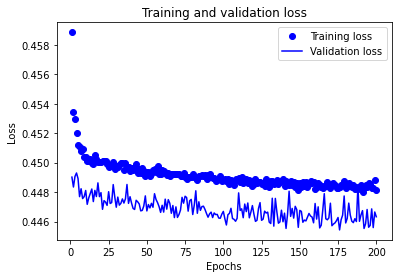

In [270]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


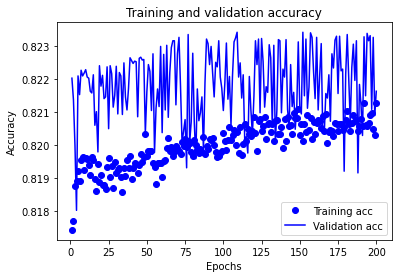

In [271]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [273]:
from keras.models import load_model
model_best = load_model('/home/ubuntu/gangmin/tsvt/multimodal/MLP_audio_chat_models/98-0.4462.hdf5')

In [274]:
y_predict = model_best.predict(test_X)

In [275]:
y_predict

array([[0.14180958],
       [0.13643873],
       [0.18009403],
       ...,
       [0.13648547],
       [0.8403502 ],
       [0.57112116]], dtype=float32)

# evaluation

In [276]:
result = np.zeros(len(y_predict))
for i,v in enumerate(y_predict):
    if v[0] >= 0.5:
        result[i] = 1
    else:
        result[i] = 0

In [280]:
result
len(result)

44261

In [278]:
test_y

highlight
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
44256        1.0
44257        1.0
44258        1.0
44259        1.0
44260        1.0

[44261 rows x 1 columns]

In [284]:
test_y = np.asarray(test_y['highlight'])

In [285]:
average = [0,0,0,0,0]

TP = 0
FP = 0
TN = 0
FN = 0


for i,v in enumerate(result):
    if result[i] ==1 and test_y[i]==1:
        TP+=1
    elif result[i] ==1 and test_y[i]==0:
        FP+=1
    elif result[i] ==0 and test_y[i]==1:
        TN+=1
    else:
        FN+=1
    
precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN) / (TP+FN+FP+TN)


f1 = (2*precision*recall / (precision + recall))

print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(precision,recall,f1,accuracy))
average[0]+= precision
average[1] += recall
average[2] += f1
average[3] += accuracy
average[4]+=1

precision : 0.6920415224913494, recall : 0.010836584308625921, f1 : 0.021339023739663912, accuracy : 0.17105352341790742


In [286]:
print('precision : {}, recall : {}, f1 : {}, accuracy : {}'.format(average[0]/average[4],average[1]/average[4],average[2]/average[4],average[3]/average[4]))

precision : 0.6920415224913494, recall : 0.010836584308625921, f1 : 0.021339023739663912, accuracy : 0.17105352341790742
